# Pymaceuticals Inc.
---

### Analysis

- There are a total of 248 unique mouse IDs. 51% are male, with 49% being female. Capomulin and Ramicane have the most testpoints, and Propriva having the least. However, there are at least 150 for each drug being tested.
- When examining Capomulin's test regime, the trend indicates that larger mice do not respond as well to the treatment. This would be expected however with the understanding that dosage efficacy is typically tied to body weight.
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
composite_df=pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
composite_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
composite_df['Mouse ID'].nunique()

249

In [49]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
twins_df=composite_df.loc[composite_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
twins_df

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df=composite_df.loc[composite_df['Mouse ID']=="g989", :]
duplicated_df=composite_df.set_index('Mouse ID')
duplicated_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=duplicated_df.drop(['g989'])
clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [231]:
# Checking the number of mice in the clean DataFrame.
clean_df=clean_df.reset_index()
clean_df['Mouse ID'].value_counts()

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

In [232]:
clean_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [233]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary=clean_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean=tumor_summary['Tumor Volume (mm3)'].mean()
tumor_median=tumor_summary['Tumor Volume (mm3)'].median()
tumor_var=tumor_summary['Tumor Volume (mm3)'].var()
tumor_std=tumor_summary['Tumor Volume (mm3)'].std()
tumor_sem=tumor_summary['Tumor Volume (mm3)'].sem()
tumor_summary_df=pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                              "Median Tumor Volume":tumor_median,
                              "Tumor Volume Variance":tumor_var,
                              "Tumor Volume Std. Dev":tumor_std,
                              "Tumor Volume Std. Err.":tumor_sem})
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [234]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumsum2_df=clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
tumsum2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

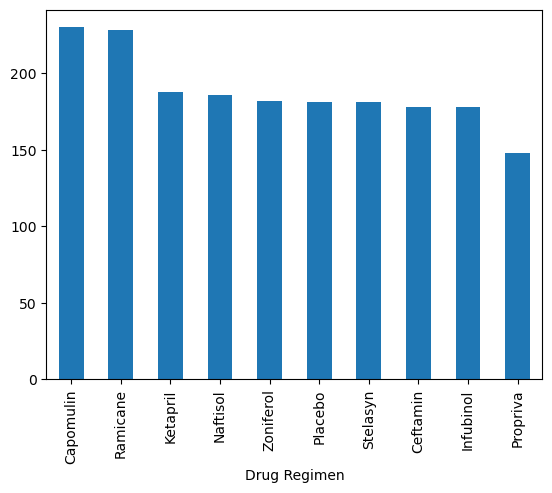

In [235]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandamouse=clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
pandamouse.sort_values(ascending=False).plot.bar()
plt.show()

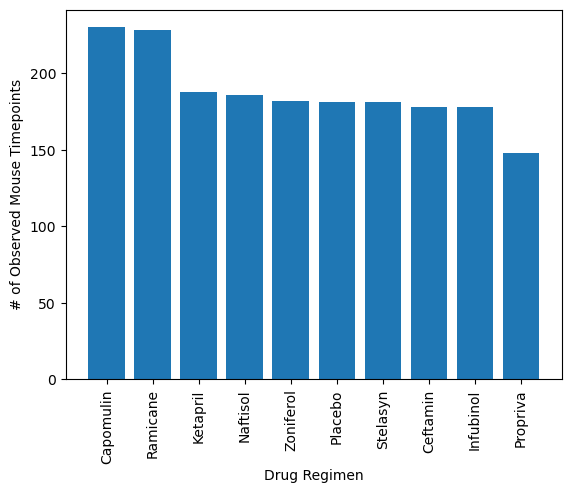

In [236]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pymouse=pandamouse.sort_values(ascending=False)
plt.bar(pymouse.index,pymouse.values)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

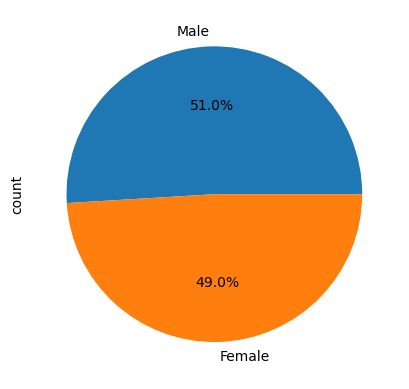

In [237]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandasex=clean_df['Sex'].value_counts()
pandasex.plot.pie(autopct="%1.1f%%")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

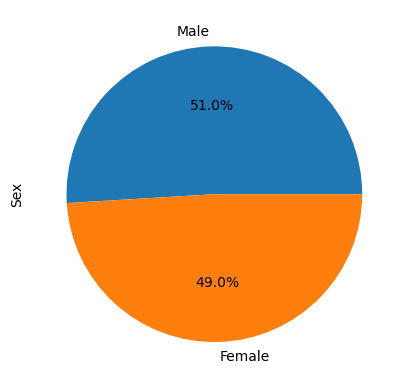

In [238]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pandasex, labels=pandasex.index.values, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [239]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp=clean_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp2=pd.DataFrame(last_tp)
final_tp=pd.merge(clean_df2, last_tp2, on=('Mouse ID','Timepoint'), how='right')
final_tp

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,483,a262,Placebo,Female,17,29,45,70.717621,4
3,493,a275,Ceftamin,Female,20,28,45,62.999356,3
4,500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,1849,z435,Propriva,Female,12,26,10,48.710661,0
244,84,z578,Ramicane,Male,11,16,45,30.638696,0
245,1859,z581,Infubinol,Female,24,25,45,62.754451,3
246,1869,z795,Naftisol,Female,13,29,45,65.741070,3


In [240]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatedby_capomulin=[]
treatedby_ramicane=[]
treatedby_infubinol=[]
treatedby_ceftamin=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_tp.iterrows():
    if row['Drug Regimen']=='Capomulin':
        treatedby_capomulin.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen']=='Ramicane':
        treatedby_ramicane.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen']=='Infubinol':
        treatedby_infubinol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen']=='Ceftamin':
        treatedby_ceftamin.append(row['Tumor Volume (mm3)'])
    
    # add subset 
treatment_df=pd.DataFrame({"Capomulin":treatedby_capomulin,
                          "Ramicane":treatedby_ramicane,
                          "Infubinol":treatedby_infubinol,
                          "Ceftamin":treatedby_ceftamin,})
treatment_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [14]:
    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


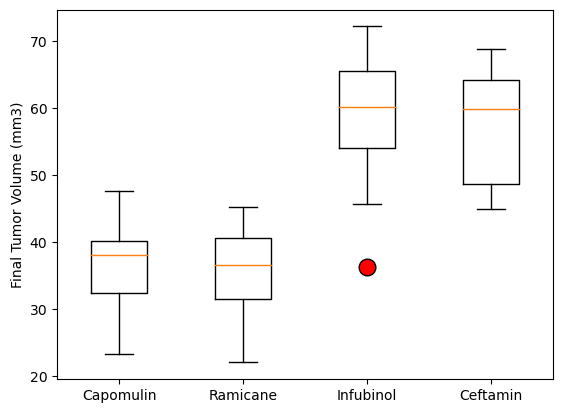

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

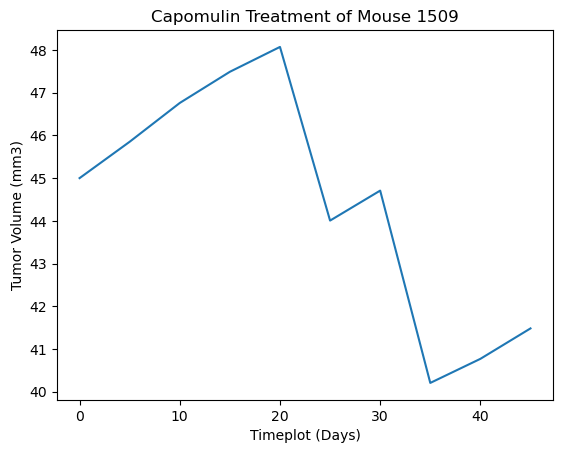

In [241]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
lineplot=clean_df.loc[clean_df['Mouse ID']=='l509',:]
plt.plot(lineplot['Timepoint'],lineplot['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse 1509')
plt.xlabel('Timeplot (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

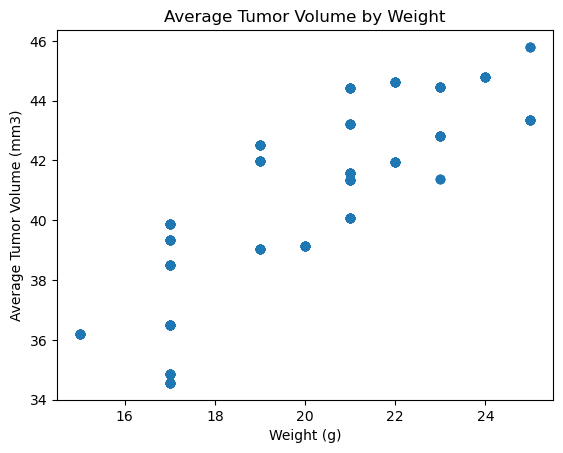

In [242]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capaverage = pd.DataFrame(scatter_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
capaverage = pd.merge(scatter_df, capaverage, on='Mouse ID')
capaverage2 = capaverage_df[['Weight (g)', 'Average Tumor Volume (mm3)']]
x = capaverage2['Weight (g)']
y = capaverage2['Average Tumor Volume (mm3)']
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

In [227]:
# Calculate the correlation coefficient and a linear regression model
scatter = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capaverage = pd.DataFrame(scatter_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
capaverage = pd.merge(scatter_df, capaverage, on='Mouse ID')
capaverage2 = capaverage_df[['Weight (g)', 'Average Tumor Volume (mm3)']]
x = capaverage2['Weight (g)']
y = capaverage2['Average Tumor Volume (mm3)']
correlation = st.pearsonr(capaverage['Weight (g)'],capaverage['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.53
